# Automatic Recognition of Persuasive Content on Electronic News + Text Rank

https://colab.research.google.com/github/dipanjanS/nlp_workshop_odsc19/blob/master/Module05%20-%20NLP%20Applications/Project06%20-%20Text%20Summarization.ipynb

# Install Lib

In [1]:
import nltk
nltk.download("popular")
from nltk.corpus import stopwords
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
!pip install nlp-id
!pip install transformers
from keras.preprocessing import sequence
import numpy as np
!pip install torch
!pip install tensorflow
!pip install bertviz
!pip install joblib
!pip install networkx==2.6.3

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Asiyah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Asiyah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Asiyah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Asiyah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Asiyah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_dat

  Using cached networkx-2.6.3-py3-none-any.whl.metadata (5.0 kB)
Using cached networkx-2.6.3-py3-none-any.whl (1.9 MB)
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6
    Uninstalling networkx-2.6:
      Successfully uninstalled networkx-2.6


# Init Data

In [2]:
pip list

Package                   Version
------------------------- --------------
absl-py                   2.1.0
accelerate                0.29.3
aiohappyeyeballs          2.3.5
aiohttp                   3.10.3
aiosignal                 1.3.1
anyio                     4.2.0
argon2-cffi               21.3.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.0.5
astunparse                1.6.3
async-lru                 2.0.4
attrs                     23.1.0
Babel                     2.11.0
beautifulsoup4            4.12.3
bertviz                   1.4.0
bleach                    4.1.0
boto3                     1.34.70
botocore                  1.34.70
Bottleneck                1.3.7
Brotli                    1.0.9
certifi                   2025.1.31
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
colorama                  0.4.6
comm                      0.2.1
contourpy                 1.2.0
cycler       

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
from io import BytesIO

import requests
import pandas as pd

r = requests.get('https://docs.google.com/spreadsheet/ccc?key=1i3BBozbnx9HSTkMsfMHChvzYwG_2MiFB06U05gitD8U&output=xlsx')
data = r.content
dataset = pd.read_excel(data, 'Prepocessed (3)')
dataset

C:\Users\Asiyah\AppData\Local\Temp\ipykernel_8064\3219960653.py:8: FutureWarning: Passing bytes to 'read_excel' is deprecated and will be removed in a future version. To read from a byte string, wrap it in a `BytesIO` object.
  dataset = pd.read_excel(data, 'Prepocessed (3)')


,id-berita,url,judul,content per paragraf,label-positif,label-persuasif,label-produk,perspektif-tunggal,label-berita,labels,content_lower,content_punct,content_lemma,content_token,content_stopwords
0,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Absen Online kini mulai merambah ke berbagai p...,0,0,1,1,native ads,1,absen online kini mulai merambah ke berbagai p...,absen online kini mulai merambah ke berbagai p...,absen online kini mulai rambah ke bagai usaha ...,"['absen', 'online', 'rambah', 'usaha', 'ganti'...",absen online rambah usaha ganti absen manual r...
1,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Sebelum mengetahui manfaat absen online bagi p...,1,1,1,1,native ads,1,sebelum mengetahui manfaat absen online bagi p...,sebelum mengetahui manfaat absen online bagi p...,belum tahu manfaat absen online bagi usaha mar...,"['manfaat', 'absen', 'online', 'usaha', 'mari'...",manfaat absen online usaha mari ajar erti lapo...
2,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Semua data tersebut selanjutnya akan diberikan...,1,0,1,1,native ads,1,semua data tersebut selanjutnya akan diberikan...,semua data tersebut selanjutnya akan diberikan...,semua data sebut lanjut akan beri kepada hrd y...,"['data', 'hrd', 'tanggung', 'gaji', 'karyawan'...",data hrd tanggung gaji karyawan data hrd rugi ...
3,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Setiap hari karyawan melakukan absen dengan me...,1,1,0,1,native ads,1,setiap hari karyawan melakukan absen dengan me...,setiap hari karyawan melakukan absen dengan me...,tiap hari karyawan laku absen dengan tulis jam...,"['karyawan', 'laku', 'absen', 'tulis', 'jam', ...",karyawan laku absen tulis jam hadir tanda tang...
4,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,"Sementara, Absen online merupakan sistem absen...",1,1,1,1,native ads,1,"sementara, absen online merupakan sistem absen...","sementara, absen online merupakan sistem absen...",sementara absen online rupa sistem absensi yan...,"['absen', 'online', 'rupa', 'sistem', 'absensi...",absen online rupa sistem absensi manfaat jarin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,Donald Trump yang menjadi lawan Biden sekaligu...,-1,0,0,1,berita murni,0,donald trump yang menjadi lawan biden sekaligu...,donald trump yang menjadi lawan biden sekalig...,donald trump yang jadi lawan biden sekaligus t...,"['donald', 'trump', 'lawan', 'biden', 'tahana'...",donald trump lawan biden tahana coba serang bi...
2498,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,"Dalam utas tersebut, Taibbi mengatakan bahwa a...",0,0,0,1,berita murni,0,"dalam utas tersebut, taibbi mengatakan bahwa a...","dalam utas tersebut, taibbi mengatakan bahwa a...",dalam utas sebut taibbi kata bahwa apa yang ak...,"['utas', 'taibbi', 'baca', 'cuplik', 'buah', '...",utas taibbi baca cuplik buah serial dasar ribu...
2499,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,"Namun menurut Taibbi, Twitter pelan-pelan mala...",-1,0,0,0,berita murni,0,"namun menurut taibbi, twitter pelan-pelan mala...","namun menurut taibbi, twitter pelan-pelan mala...",namun turut taibbi twitter pelan malah tambah ...,"['taibbi', 'twitter', 'pelan', 'halang', 'hala...",taibbi twitter pelan halang halang alat kontro...
2500,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,Taibbi juga menyebut sejumlah partai politik m...,-1,0,1,1,berita murni,0,taibbi juga menyebut sejumlah partai politik m...,taibbi juga menyebut sejumlah partai po

In [5]:
len(dataset)

2502

In [6]:
import re

def changeQuotation(text):
  text = re.sub(r'"',r'“', text)
  return text

In [7]:
dataset['content per paragraf'] = dataset['content per paragraf'].apply(changeQuotation)

## Split dataset

In [8]:
# Misalkan menggunakan `content_lemma` sebagai input
texts = dataset['content_lemma'].values
# Variabel target y adalah kombinasi dari empat label
y = dataset['labels'].values

In [9]:
# x_train1,y_train,x_test1,y_test = train_test_split(embed1,y,80)
# x_train1,x_test1,y_train,y_test = train_test_split(embed1, y, test_size=0.3, random_state=0)
from sklearn.model_selection import KFold

# kf = KFold(n_splits=4)           #KFold(n_splits=’warn’, shuffle=False, random_state=None)
kf = KFold(5,shuffle=True, random_state=0) # Use for KFold classification

for train_index, validation_index in kf.split(texts):
   #print("TRAIN:", texts[train_index], "VALIDATION:", texts[validation_index])
   x_train, x_test = texts[train_index], texts[validation_index]
   y_train, y_test = y[train_index], y[validation_index]

(2002, 2)


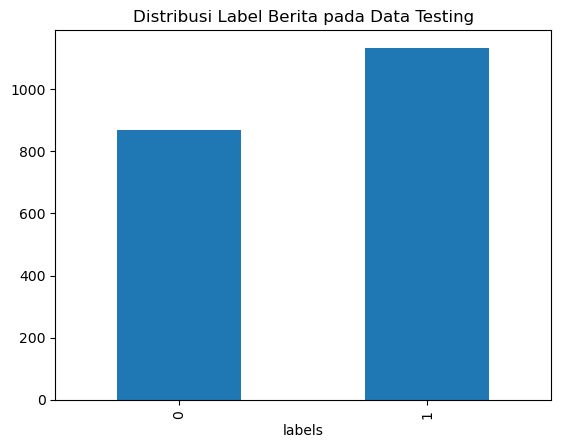

In [10]:
import matplotlib.pyplot as plt

df_train = pd.DataFrame(list(zip(x_train, y_train)), columns=['content_lemma', 'labels'])
df_train.groupby(['labels']).size().plot(kind='bar')
plt.title('Distribusi Label Berita pada Data Testing')
print(df_train.shape)

(500, 2)


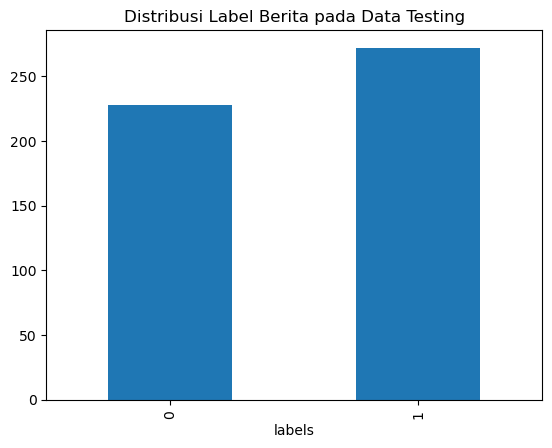

In [11]:
df_test = pd.DataFrame(list(zip(x_test, y_test)), columns=['content_lemma', 'labels'])
df_test.groupby(['labels']).size().plot(kind='bar')
plt.title('Distribusi Label Berita pada Data Testing')
print(df_test.shape)

# Word Embedding (roBERTa)

In [12]:
from transformers import RobertaTokenizer, TFRobertaModel

tokenizer = RobertaTokenizer.from_pretrained('cahya/roberta-base-indonesian-522M', do_lower_case=True)
indo_roberta = TFRobertaModel.from_pretrained('cahya/roberta-base-indonesian-522M', from_pt=True)

# Tokenisasi data input (X_train dan X_test)
inputs_train = tokenizer(list(x_train), padding=True, truncation=True, return_tensors="tf")
inputs_test = tokenizer(list(x_test), padding=True, truncation=True, return_tensors="tf")

# Mendapatkan output dari model IndoBERT
train_output = indo_roberta(inputs_train)[0]  # (batch_size, sequence_length, hidden_size)
test_output = indo_roberta(inputs_test)[0]   # (batch_size, sequence_length, hidden_size)

# Mengambil representasi dari token [CLS] sebagai representasi untuk seluruh teks
X_train_features = train_output[:, 0, :].numpy()  # Ambil vektor dari token pertama [CLS]
X_test_features = test_output[:, 0, :].numpy()    # Ambil vektor dari token pertama [CLS]

C:\Users\Asiyah\anaconda3\envs\asiyah_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.decoder.bias', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFRobertaModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.
Asking to truncate to max_length but no maximum 

# SVM

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Latih model SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_features, y_train)

# Prediksi dengan SVM
y_pred_svm = svm_model.predict(X_test_features)

# Evaluasi model SVM
print(f"Akurasi model SVM: {accuracy_score(y_test, y_pred_svm):.4f}")
print(classification_report(y_test, y_pred_svm))

Akurasi model SVM: 0.8740
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       228
           1       0.87      0.90      0.89       272

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500



In [16]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder untuk mengonversi label ke format numerik
encoder = LabelEncoder()

# Konversi y_test dan y_pred_svm ke numerik
y_test_numeric = encoder.fit_transform(y_test)
y_pred_svm_numeric = encoder.transform(y_pred_svm)

# Cek hasil konversi
print(f"Contoh y_test: {y_test[:10]}")
print(f"Contoh y_test_numeric: {y_test_numeric[:10]}")

Contoh y_test: [1 1 1 1 1 1 1 1 1 1]
Contoh y_test_numeric: [1 1 1 1 1 1 1 1 1 1]


In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test_numeric, y_pred_svm_numeric,average='macro')
print('Precision : ',format(precision))
print('Recall    : ',format(recall))
print('F-score   : ',format(fscore))
print('Accuracy : ',accuracy_score(y_test_numeric, y_pred_svm_numeric))

Precision :  0.8739275693734897
Recall    :  0.8717750257997936
F-score   :  0.8726753139665074
Accuracy :  0.874


In [ ]:
# print ("Number of layers:", len(hidden_states), "  (initial embeddings + 12 BERT layers)")
# print ("Number of batches:", len(hidden_states[0]))
# print ("Number of tokens:`", len(hidden_states[0][0]))
# print ("Number of hidden units:", len(hidden_states[0][0][0]))

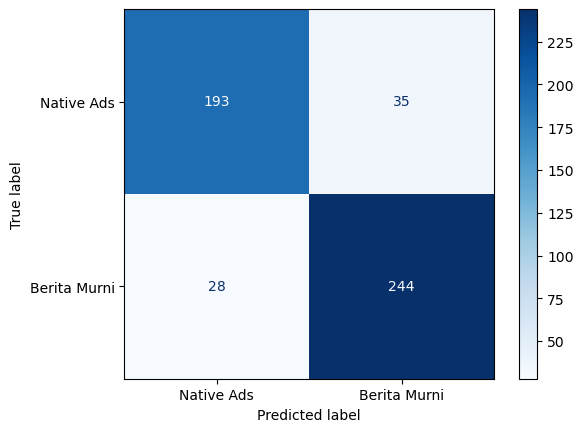

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

labels = ["Native Ads", "Berita Murni"]

cm = confusion_matrix(y_test_numeric, y_pred_svm_numeric)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
# token_embeddings = torch.stack(hidden_states, dim=0)
# token_embeddings.size()

In [ ]:
# token_embeddings = token_embeddings.permute(1,2,0,3)
# token_embeddings.size()

In [ ]:
# processed_embeddings = token_embeddings[:, :, 9:, :]
# processed_embeddings.shape

In [ ]:
# embeddings_cpy = processed_embeddings.clone().detach()

### Check embedding size that used as an input for LSTM

In [ ]:
# size = (embeddings_cpy[0].size()[0],embeddings_cpy[0].size()[1],embeddings_cpy[0].size()[2])
# size

In [ ]:
# embeddings_cpy = embeddings_cpy.reshape(len(dataset), 50, 3072)

In [ ]:
# size = (embeddings_cpy[0].size()[0],embeddings_cpy[0].size()[1])
# size

In [ ]:
# embed = embeddings_cpy.numpy()

In [ ]:
# # def train_test_split(x,y,train_percent):
# #     x = np.array(x).astype(np.float32)
# #     y = np.array(y)
# #     length = len(y)
# #     split = int(length * (train_percent/100))
# #     return (np.asarray(x[0:split]).astype(np.float32),
# #             np.asarray(y[0:split]).astype(np.float32),
# #             np.asarray(x[split:]).astype(np.float32),
# #             np.asarray(y[split:]).astype(np.float32)
# #         )
# from sklearn.model_selection import train_test_split

In [ ]:
# def combine_embedding_dataset(data1):
#     result = []
#     for d1 in zip(data1):
#         result.append([d1])
#     return np.array(result)

In [ ]:
# # Mendapatkan indeks kolom
# indeks_label_positif = dataset.columns.get_loc('label-positif')
# indeks_label_persuasif = dataset.columns.get_loc('label-persuasif')
# indeks_label_produk = dataset.columns.get_loc('label-produk')
# indeks_perspektif_tunggal = dataset.columns.get_loc('perspektif-tunggal')
# indeks_labels = dataset.columns.get_loc('labels')
# # Variabel target y adalah kombinasi dari empat label

# # label2 = dataset.iloc[:, [indeks_labels]].copy()
# # label2.head()
# y = dataset['labels'].values

In [ ]:
# len(y)

In [ ]:
#y = y.to_numpy()
#y

In [ ]:
# y = y.astype(int)
# y

In [ ]:
# x = combine_embedding_dataset(embed)

In [ ]:
# y_train = tf.keras.utils.to_categorical(y_train, 2)
# y_test = tf.keras.utils.to_categorical(y_test, 2)

## Get Evaluate Score

In [ ]:
# embed.shape

In [ ]:
# size

In [ ]:
# from keras import Model
# from keras import Sequential
# from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
# from keras.layers import Input, Embedding, Conv1D, Bidirectional, LSTM, Dense, Dropout, BatchNormalization, GlobalMaxPooling1D,concatenate,ConvLSTM1D
# from keras.layers import MaxPooling1D
# from keras.layers import Flatten
# from keras.layers import SpatialDropout1D
# import joblib

source code from https://github.com/hrshtv/Twitter-Sentiment-Analysis/blob/master/old/Keras-Simple-BiLSTM.ipynb

In [ ]:
# # Mendapatkan embeddings dari IndoRoBERTa
# roberta_output = indo_roberta(input_ids, attention_mask=attention_mask)
# sequence_output = roberta_output[0]  # Mengambil last_hidden_state

In [ ]:
# import tensorflow as tf

# out = tf.keras.layers.BatchNormalization()(sequence_output)
# out = tf.keras.layers.Dropout(0.2)(out)
# out = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True))(out)
# out = tf.keras.layers.GlobalMaxPooling1D()(out)
# out = tf.keras.layers.Dropout(0.2)(out)
# y = tf.keras.layers.Dense(2, activation="sigmoid")(out)

# model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=y)
# model.layers[2].trainable = True

# optimizer = tf.keras.optimizers.Adam(learning_rate=2e-05)
# loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
# metric = tf.keras.metrics.CategoricalAccuracy('balanced_accuracy')

# model.compile(optimizer=optimizer, loss=loss, metrics=metric)
# model.summary()


In [ ]:
# import tensorflow as tf
# tf.keras.backend.clear_session()

# model = Sequential([
#     # Lapisan embedding yang mengonversi input integer menjadi vektor dense
#     Embedding(input_dim=257, output_dim=300, input_length=257, ),
#     BatchNormalization(),
#     Dropout(0.2),  # Tambahkan Dropout
#     # Lapisan BiLSTM
#     Bidirectional(LSTM(256, return_sequences=True)),
#     GlobalMaxPooling1D(),  # Tambahkan GlobalMaxPooling1D
#     # Opsional: Tambahkan dropout untuk regularisasi
#     Dropout(0.2),
#     # Lapisan Dense untuk klasifikasi
#     Dense(2, activation='sigmoid')  # '4' sesuai dengan jumlah label target Anda, sesuaikan jika berbeda
# ])

# # Ringkasan model
# model.summary()


In [ ]:
# y_train_dl = tf.keras.utils.to_categorical(y_train)
# y_test_dl = tf.keras.utils.to_categorical(y_test)

In [ ]:
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',  # Gunakan 'sparse_categorical_crossentropy' jika label adalah integer
#               metrics=['accuracy'])

In [ ]:
# history = model.fit(x=x_train, y=y_train, epochs=50, batch_size=128, validation_data=(x_test,y_test), verbose=1)
# save_path = '/content/drive/MyDrive/Colab Notebooks/Thesis Persuasive Detection at Paragraph-Level  /Embedding Models/model_roberta_bilstm.pkl'
# joblib.dump(model, save_path)
# score = model.evaluate(x_test, y_test,verbose=0)
# print("Accuracy: {}".format(score[1] * 100))

In [ ]:
import numpy as np
from sklearn import metrics

y = np.array(y_true)

scores = np.array(y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred, pos_label=9)
roc_auc = metrics.auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_true, y_pred)
auc_rf = auc(fpr_rf, tpr_rf)

In [ ]:
auc_rf

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

In [ ]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr,tpr)
  plt.axis([0,1,0,1])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.show()

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr , tpr , thresholds = roc_curve (y_true, y_pred)

In [ ]:
plot_roc_curve (fpr,tpr)

In [ ]:
roc_auc_score(y_true, y_pred)

In [ ]:
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_true, y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
print(auc_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)

In [ ]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)):
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [ ]:
perf_measure(y_true, y_pred)

In [ ]:
acc = history.history['balanced_accuracy']
val_acc = history.history['val_balanced_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

# ROC

C:\Users\Asiyah\anaconda3\envs\asiyah_env\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


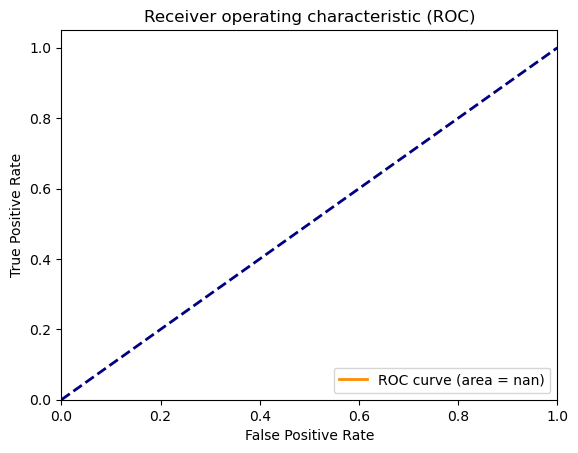

In [19]:
from sklearn import metrics

y = np.array(y_test_numeric)
scores = np.array(y_pred_svm_numeric)
fpr, tpr, thresholds = metrics.roc_curve(y_test_numeric, y_pred_svm_numeric, pos_label=9)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [20]:
from sklearn.metrics import roc_curve, auc

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_numeric, y_pred_svm_numeric)
auc_rf = auc(fpr_rf, tpr_rf)
auc_rf 

0.8717750257997935

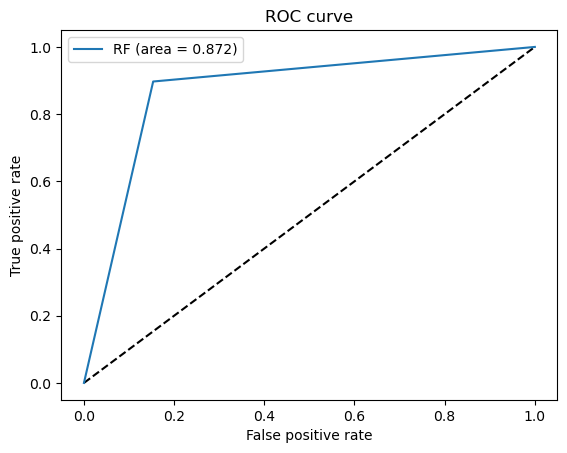

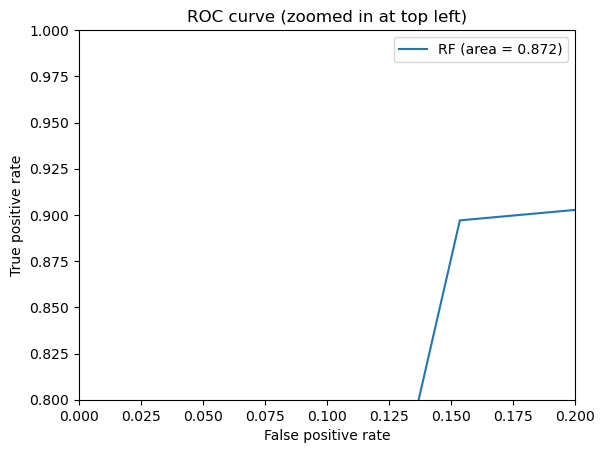

In [21]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

In [22]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr,tpr)
  plt.axis([0,1,0,1])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.show()

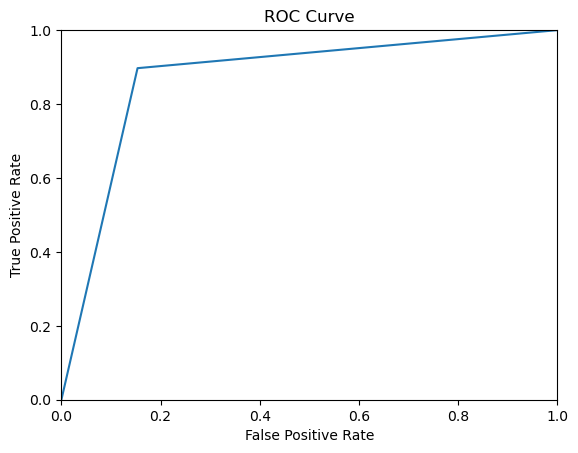

In [23]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr , tpr , thresholds = roc_curve (y_test_numeric, y_pred_svm_numeric)
plot_roc_curve (fpr,tpr)

In [31]:
roc_auc_score(y_test_numeric, y_pred_svm_numeric)

0.8717750257997935

0.8717750257997935


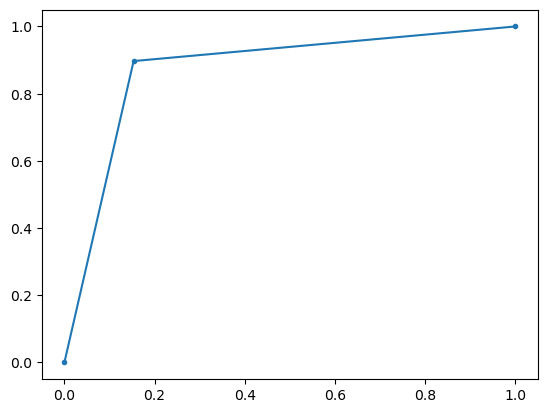

In [32]:
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test_numeric, y_pred_svm_numeric)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
print(auc_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)

In [33]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)):
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

perf_measure(y_test_numeric, y_pred_svm_numeric)

(244, 35, 193, 28)

# Menampilkan data yang salah di deteksi

In [24]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    TP_indices = []
    TN_indices = []
    FP_indices = []
    FN_indices = []

    for i in range(len(y_hat)):
        if y_actual[i] == y_hat[i] == 1:
            TP += 1
            TP_indices.append(i)
        elif y_hat[i] == 1 and y_actual[i] != y_hat[i]:  # False Positive
            FP += 1
            FP_indices.append(i)
        elif y_actual[i] == y_hat[i] == 0:
            TN += 1
            TN_indices.append(i)
        elif y_hat[i] == 0 and y_actual[i] != y_hat[i]:  # False Negative
            FN += 1
            FN_indices.append(i)

    return TP, FP, TN, FN, TP_indices, FP_indices, TN_indices, FN_indices

In [25]:
perf_measure(y_test_numeric, y_pred_svm_numeric)

(244,
 35,
 193,
 28,
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  105,
  106,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  139,
  140,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  159,
  160,
  161,
  162,
 

In [26]:
# Calculate the performance metrics and retrieve indices 
TP, FP, TN, FN, TP_indices, FP_indices, TN_indices, FN_indices = perf_measure(y_test_numeric, y_pred_svm_numeric)

# Select the FP and FN data from the dataset
FP_data = dataset.iloc[FP_indices][['id-berita', 'url', 'content per paragraf', 'content_stopwords']]
FN_data = dataset.iloc[FN_indices][['id-berita', 'url', 'content per paragraf', 'content_stopwords']]

In [27]:
# Display the results
print("False Positives (FP):")
print(FP_data)
print('Jumlah dari FP adalah',len(FP_data), 'paragraf.')

print("\nFalse Negatives (FN):")
print(FN_data)
print('Jumlah dari FN adalah',len(FN_data), 'paragraf.')

False Positives (FP):
     id-berita                                                url  \
275        268  https://tekno.sindonews.com/read/683585/776/re...   
293        269  https://tekno.sindonews.com/read/673687/776/ep...   
296        269  https://tekno.sindonews.com/read/673687/776/ep...   
306        271  https://tekno.sindonews.com/read/655545/776/6-...   
312        272  https://tekno.sindonews.com/read/653809/776/in...   
343        274  https://tekno.sindonews.com/read/638045/776/as...   
357        276  https://tekno.sindonews.com/read/628343/776/op...   
364        277  https://tekno.sindonews.com/read/625267/776/xi...   
365        277  https://tekno.sindonews.com/read/625267/776/xi...   
377        278  https://tekno.sindonews.com/read/624421/776/as...   
390        278  https://tekno.sindonews.com/read/624421/776/as...   
393        278  https://tekno.sindonews.com/read/624421/776/as...   
403        280  https://tekno.sindonews.com/read/602859/776/pa...   
411        2

In [28]:
import os
# Specify the folder path
folder_path = 'E:/Asiyah/tesis/Thesis Persuasive Detection at Paragraph-Level/Mine/SVM/'  # Replace this with your desired folder path

# Full paths for saving files
fp_file_path = os.path.join(folder_path, 'FP_Data_RoBERTa-SVM-Biner.csv')
fn_file_path = os.path.join(folder_path, 'FN_Data_RoBERTa-SVM-Biner.csv')

# Save FP_data and FN_data to CSV files within the specified folder
FP_data.to_csv(fp_file_path, index=False)
FN_data.to_csv(fn_file_path, index=False)

# Word Cloud

## FP& FN

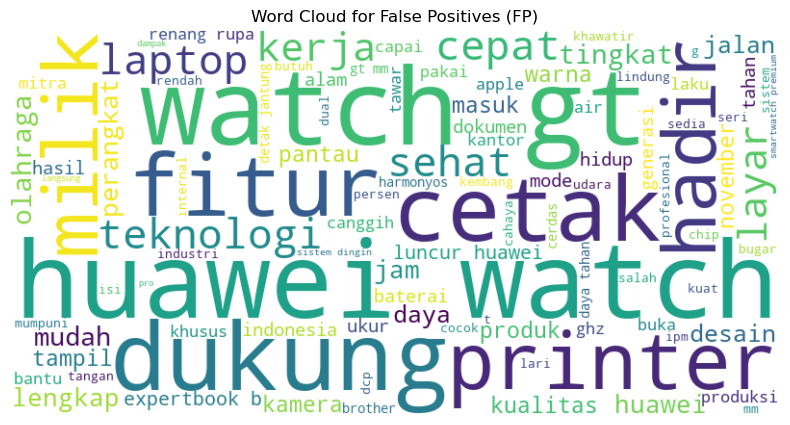

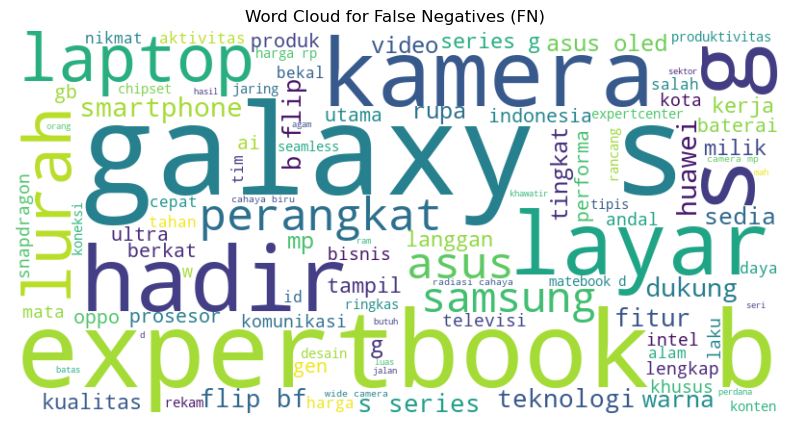

In [29]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menggabungkan semua teks dalam kolom 'content per paragraf' untuk FP dan FN
fp_text = " ".join(paragraph for paragraph in FP_data['content_stopwords'])
fn_text = " ".join(paragraph for paragraph in FN_data['content_stopwords'])

# Fungsi untuk membuat dan menampilkan word cloud
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Membuat word cloud untuk False Positives
plot_wordcloud(fp_text, "Word Cloud for False Positives (FP)")

# Membuat word cloud untuk False Negatives
plot_wordcloud(fn_text, "Word Cloud for False Negatives (FN)")

## TP & TN

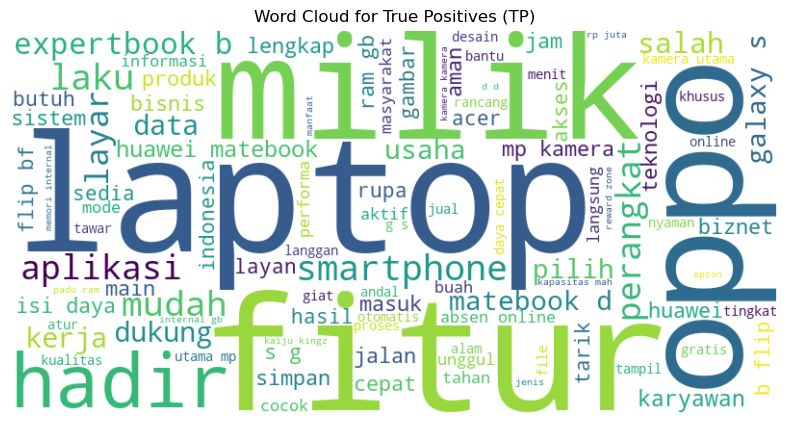

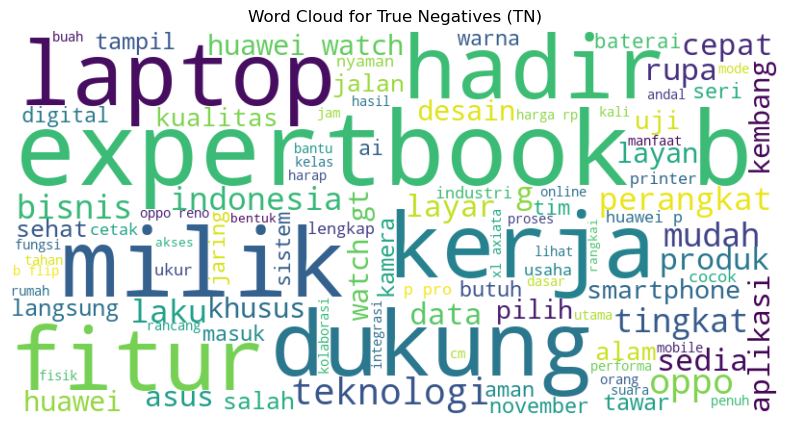

In [30]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ambil data TP dan TN dari dataset
TP_data = dataset.iloc[TP_indices]['content_stopwords']
TN_data = dataset.iloc[TN_indices]['content_stopwords']

# Gabungkan teks dari TP dan TN
tp_text = " ".join(paragraph for paragraph in TP_data)
tn_text = " ".join(paragraph for paragraph in TN_data)

# Fungsi untuk membuat dan menampilkan word cloud
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Membuat word cloud untuk True Positives
plot_wordcloud(tp_text, "Word Cloud for True Positives (TP)")

# Membuat word cloud untuk True Negatives
plot_wordcloud(tn_text, "Word Cloud for True Negatives (TN)")
